In [1]:
# prompt: import torch
# import torch.nn as nn
# import torch.optim as optim
# import pandas as pd
# from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# give me all pip code to install these libs

!pip install torch
!pip install pandas
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
# Fetch the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
#THIS CODES DOWNLOADS THE DATASET AND SET THE X Y PARAMETERS

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [8]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_dim = X_train.shape[1]
model = RegressionModel(input_dim)


In [9]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [10]:
# Number of epochs
epochs = 100

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.6661
Epoch [20/100], Loss: 0.9385
Epoch [30/100], Loss: 0.7593
Epoch [40/100], Loss: 0.5960
Epoch [50/100], Loss: 0.5262
Epoch [60/100], Loss: 0.4760
Epoch [70/100], Loss: 0.4482
Epoch [80/100], Loss: 0.4311
Epoch [90/100], Loss: 0.4185
Epoch [100/100], Loss: 0.4085


In [11]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test MSE: {test_loss.item():.4f}')


Test MSE: 0.4197


In [12]:
import matplotlib.pyplot as plt


In [14]:
loss_history = []
epochs = 100

for epoch in range(epochs):
    model.train()  # Ensure the model is in training mode
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.4002
Epoch [20/100], Loss: 0.3933
Epoch [30/100], Loss: 0.3874
Epoch [40/100], Loss: 0.3825
Epoch [50/100], Loss: 0.3782
Epoch [60/100], Loss: 0.3743
Epoch [70/100], Loss: 0.3709
Epoch [80/100], Loss: 0.3677
Epoch [90/100], Loss: 0.3646
Epoch [100/100], Loss: 0.3615


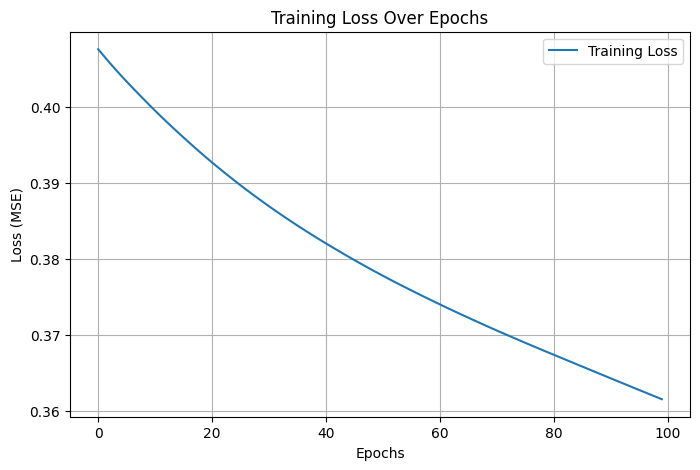

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


Test MSE: 0.3697


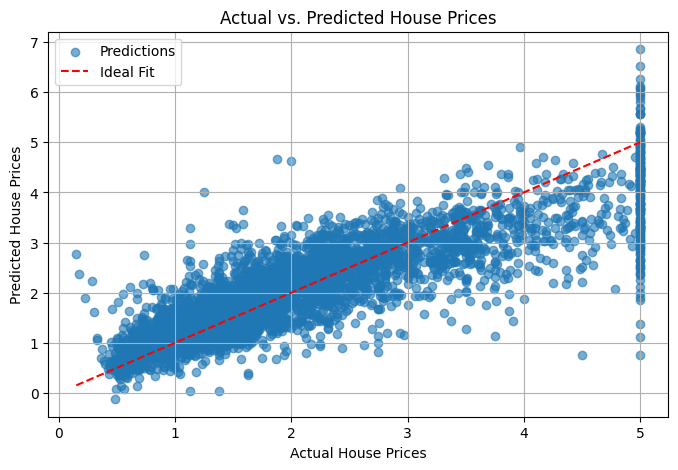

In [16]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test MSE: {test_loss.item():.4f}')

# Convert tensors to NumPy arrays for visualization
predictions_np = predictions.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

plt.figure(figsize=(8, 5))
plt.scatter(y_test_np, predictions_np, alpha=0.6, label="Predictions")
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()
